# Data and AI Democratization through PromptToQueryResult Function

In the context of data and AI democratization, `PromptToQueryResult` could be a function that translates natural language prompts into database queries. This could be part of a larger system that allows non-technical users to interact with databases using natural language, which would democratize access to data and AI.

## Business Value and Domain Problem Solutions

### Business Value:

- **Increased Efficiency:** Non-technical users can retrieve data without needing to learn SQL or other query languages, or without needing to wait for technical staff to retrieve the data for them.
- **Reduced Costs:** Less time and resources are spent on training staff to use complex database systems, and less time is spent on data retrieval tasks by technical staff.
- **Improved Decision Making:** With easier access to data, decision-making can be data-driven and timely, leading to better business outcomes.

### Domain Problem Solved:

- **Data Accessibility:** One of the challenges in data democratization is making data accessible to non-technical users. `PromptToQueryResult` could help solve this problem by providing a natural language interface to databases.
- **AI Democratization:** By using AI to translate natural language prompts into database queries, `PromptToQueryResult` could also contribute to AI democratization. It could be part of a system that allows users to leverage the power of AI without needing to understand the technical details.

## Implementation Details

The selected code is written in Python and it's part of a larger program that uses a plugin-based architecture. The code is using a kernel object to manage plugins and their functions.

- **Variable Definitions:** First, two variables are defined: `plugins_directory` and `file_path`. The `plugins_directory` variable is set to the string `"plugins"`, which is presumably the directory where the plugins are stored. The `file_path` variable is set to `"data_schema.txt"`, which is likely a file that contains a data schema.

- **Reading Data Schema:** The `read_data_schema_from_file` function is then called with `file_path` as an argument. This function reads the data schema from the specified file and returns it as a string. The returned data schema is stored in the `data_schema` variable.

- **Conditional Plugin Import:** Next, there's an if-statement that checks the `prompt_rephrase` variable. If `prompt_rephrase` is true, the code imports a plugin named `"PromptPlugin"` from the plugins directory using the `import_plugin_from_prompt_directory` method of the kernel object. This method returns a dictionary-like object of functions provided by the plugin. The `"PromptRephraser"` function from the `"PromptPlugin"` plugin is then stored in the `rephraserFunction` variable.

- **Function Invocation:** The `rephraserFunction` is then invoked asynchronously using the `invoke` method of the kernel object. The `invoke` method is called with two arguments: the function to be invoked and a `KernelArguments` object that contains the data schema and a query. The result of the function invocation is stored in the `rephrased_prompt` variable.

- **Importing Another Plugin:** Finally, the code imports another plugin named `"DataPlugin"` from the plugins directory and stores the `"DatabaseDescriptor"` function from this plugin in the `descriptorFunction` variable. This function can presumably be used later in the code to describe a database based on the data schema.


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from main import PromptToQueryResult
from services import Service

Rephrasing prompt...
Generating SQL and Python code with LLM...
User query: en çok satış yapan top 100 ürün
Rephrased prompt: "Identify the top 100 best-selling products based on the total quantity sold across all orders. Include the product name, brand, category, and total quantity sold. Recommend a bar chart to visualize the top 10 products for better comparison."#
SQL:  
SELECT 
    p.product_name, 
    b.brand_name, 
    c.category_name, 
    SUM(oi.quantity) AS total_quantity_sold
FROM 
    order_items oi
JOIN 
    products p ON oi.product_id = p.product_id
JOIN 
    brands b ON p.brand_id = b.brand_id
JOIN 
    categories c ON p.category_id = c.category_id
GROUP BY 
    p.product_name, b.brand_name, c.category_name
ORDER BY 
    total_quantity_sold DESC
LIMIT 100;

PYTHON: 
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is the DataFrame containing the query result
top_10_products = df.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_products['product_name

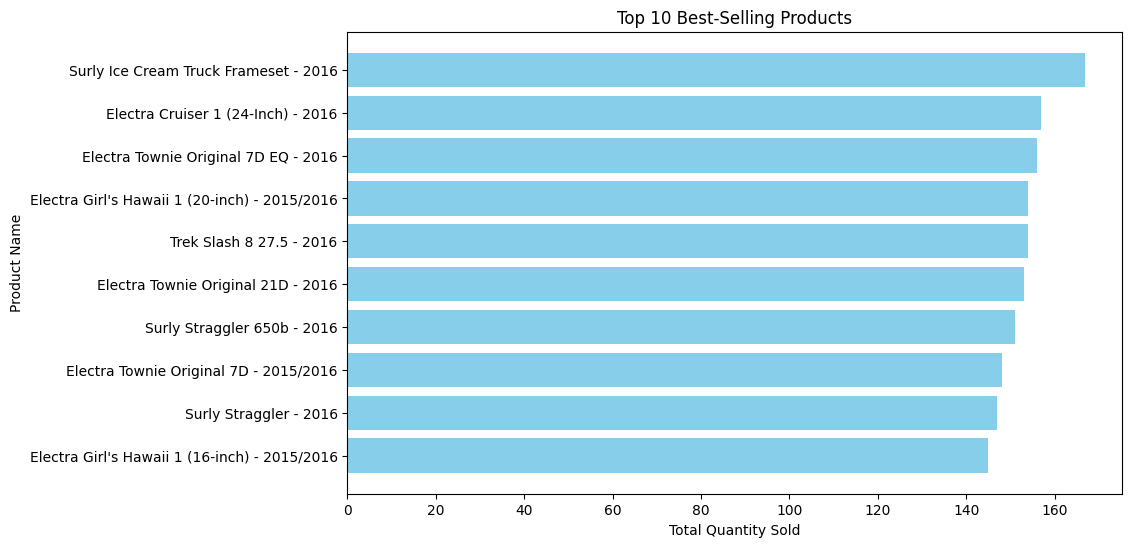

,product_name,brand_name,category_name,total_quantity_sold
0,Surly Ice Cream Truck Frameset - 2016,Surly,Mountain Bikes,167
1,Electra Cruiser 1 (24-Inch) - 2016,Electra,Cruisers Bicycles,157
2,Electra Townie Original 7D EQ - 2016,Electra,Cruisers Bicycles,156
3,Electra Girl's Hawaii 1 (20-inch) - 2015/2016,Electra,Children Bicycles,154
4,Trek Slash 8 27.5 - 2016,Trek,Mountain Bikes,154
...,...,...,...,...
95,Trek Stache 5 - 2017,Trek,Mountain Bikes,25
96,Sun Bicycles Drifter 7 - Women's - 2017,Sun Bicycles,Comfort Bicycles,24
97,Sun Bicycles Lil Kitt'n - 2017,Sun Bicycles,Children Bicycles,24
98,Trek Boy's Kickster - 2015/2017,Trek,Children Bicycles,24


In [4]:
await PromptToQueryResult(prompt_rephrase=True, debug=True ,selected_service=Service.DeepSeek)

In [ ]:
await PromptToQueryResult(prompt_rephrase=True, debug=True ,selected_service=Service.AzureOpenAI)

In [ ]:
await PromptToQueryResult(prompt_rephrase=True, debug=True ,selected_service=Service.HuggingFace, model_name="Llama318BInstruct", model_mode="chat")

In [ ]:
await PromptToQueryResult(prompt_rephrase=True, debug=True ,selected_service=Service.HuggingFace, model_name="mistralaiMixtral8xbInstruct01", model_mode="chat")

In [ ]:
await PromptToQueryResult(prompt_rephrase=True, debug=True ,selected_service=Service.Gemini)

In [1]:
from main import GenerateQuestions
from main import ReadQuestionsAndGenerateAnswers
from services import Service

In [ ]:
await GenerateQuestions(selected_service=Service.ClaudeAI, debug=True)

In [ ]:
await ReadQuestionsAndGenerateAnswers(filename="questions/2024-12-27.txt", selected_service=Service.ClaudeAI, debug=True)

In [ ]:
await ReadQuestionsAndGenerateAnswers(filename="questions/2024-12-27.txt", selected_service=Service.AzureOpenAI, debug=False)

In [ ]:
await ReadQuestionsAndGenerateAnswers(filename="questions/2024-12-27.txt", selected_service=Service.Gemini, debug=False)

In [ ]:
await GenerateQuestions(selected_service=Service.AzureOpenAI, debug=True)

In [ ]:
await ReadQuestionsAndGenerateAnswers(filename="questions/2025-01-03.txt", selected_service=Service.ClaudeAI, debug=True)

In [ ]:
await ReadQuestionsAndGenerateAnswers(filename="questions/2025-01-03.txt", selected_service=Service.AzureOpenAI, debug=True)

In [ ]:
await ReadQuestionsAndGenerateAnswers(filename="questions/2025-01-03.txt", selected_service=Service.Gemini, debug=True)

In [ ]:
await GenerateQuestions(selected_service=Service.Gemini, debug=True)

In [ ]:
await ReadQuestionsAndGenerateAnswers(filename="questions/2025-01-04.txt", selected_service=Service.ClaudeAI, debug=True)

In [ ]:
await ReadQuestionsAndGenerateAnswers(filename="questions/2025-01-04.txt", selected_service=Service.AzureOpenAI, debug=True)

In [ ]:
await ReadQuestionsAndGenerateAnswers(filename="questions/2025-01-04.txt", selected_service=Service.Gemini, debug=True)